# 1.) Preprocess your data into scaled input variables and an output variable


In [49]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [50]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [51]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/CLV.csv")


In [52]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [53]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [7]:
X

,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [57]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [58]:
clf = MLPRegressor()
params = {"hidden_layer_sizes":[(3,), (10,), \
                                (20,5,),(30,10,5,),(35, 20, 10, 10,)],\
          "activation":['relu','logistic','tanh']}

In [59]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(3,), (10,), (20, 5),
                                                (30, 10, 5),
                                                (35, 20, 10, 10)]})

In [ ]:
print(grid.best_params_)

# 3.) Train a model with the optimal solution from GridSearch

In [61]:
MLPRegressor(**grid.best_params_)


MLPRegressor(hidden_layer_sizes=(35, 20, 10, 10))

In [62]:
mlpr=MLPRegressor(**grid.best_params_)
mlpr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(35, 20, 10, 10))

In [63]:
y_pred_in=mlpr.predict(X_train)
y_pred_out=mlpr.predict(X_test)

# 4.) What are the in-sample and out of sample MSEs

In [64]:
from sklearn.metrics import mean_squared_error
out_mse=mean_squared_error(y_test,y_pred_out)

In [65]:
in_mse = mean_squared_error(y_train, y_pred_in)

In [66]:
print('In sample MSE:', in_mse)
print('Out of sample MSE:', out_mse)

In sample MSE: 40793098.48137425
Out of sample MSE: 46822651.49110731


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [67]:
import keras.models
from keras.optimizers import Adam 
from keras.models import Sequential 
from keras.layers import Dense

In [68]:
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

In [69]:
from keras import optimizers
model.compile(loss='mse',optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose = 0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [70]:
keras.models.save_model(model, '/content/gdrive/MyDrive/Colab Notebooks')

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [71]:
from tensorflow.keras.utils import plot_model

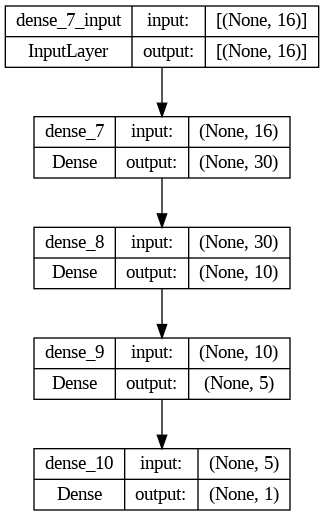

In [72]:
plot_model(model, show_shapes = True)

In [87]:
pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from ann_visualizer.visualize import ann_viz
ann_viz(model,filename="/content/gdrive/MyDrive/Colab Notebooks/CLV.csv");

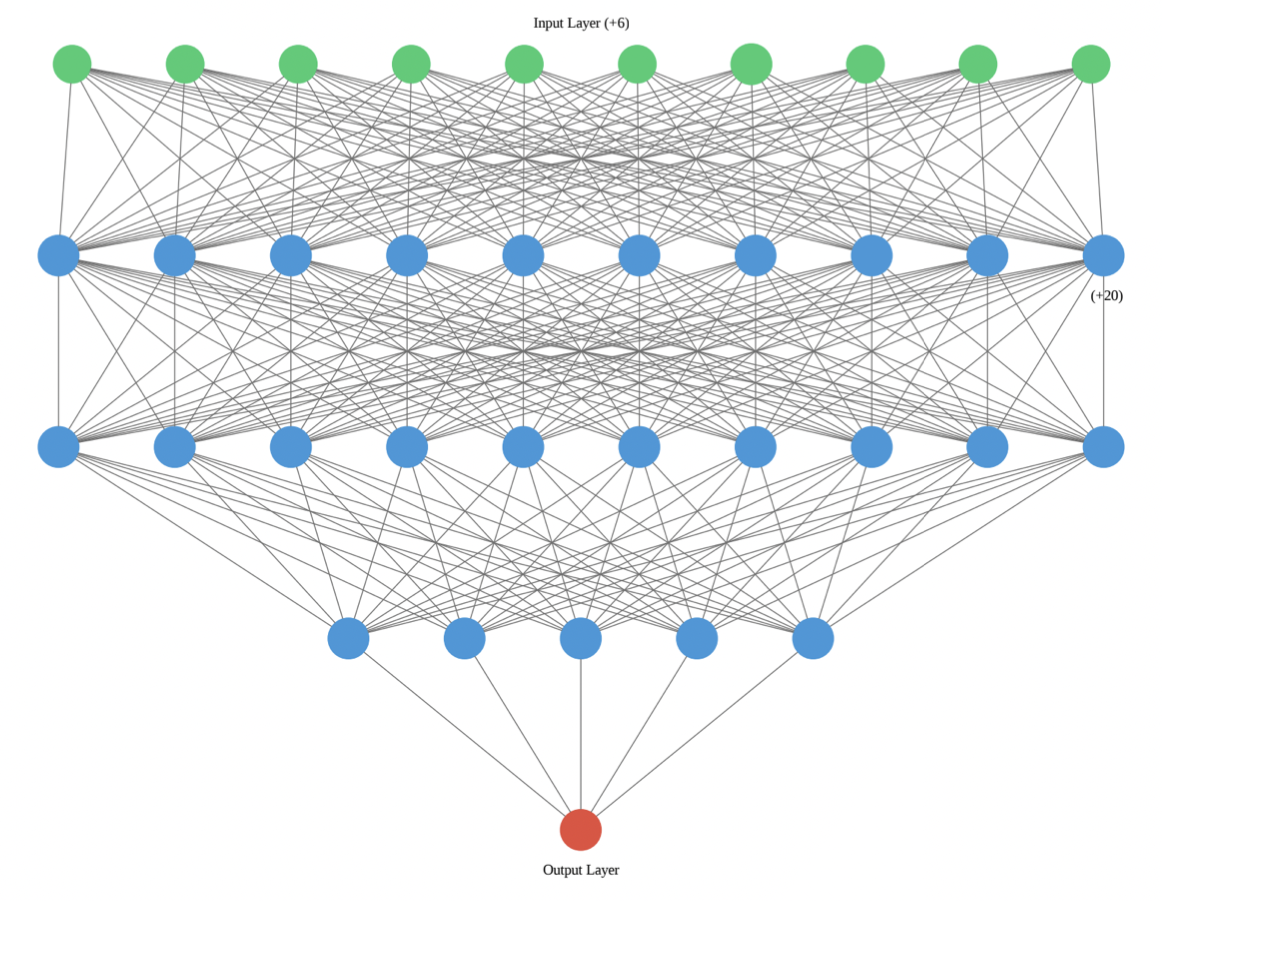